In [1]:
from icdar21_mapseg_eval.point_detection import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
ground_truth = np.float32([
    [5710, 1170],  # A
    [8080, 1170],  # B
    [3330, 3530],  # C
    [5710, 3550],  # D
    [8085, 3540],  # E
    [3327, 5922],  # F
    [5715, 5940],  # G
    [8085, 5942]]) # H

In [5]:
radius_limit = 118

In [6]:
 predicted = np.float32([
    # A
    [5710, 1170], # exact match
    # B
    [8080 + 2*radius_limit, 1170+2*radius_limit], # Match outside acceptable area
    # C
    [3330+10, 3530+10], # multiple acceptable matches
    [3330-10, 3530-10],
    [3330+10, 3530+0],
    [3330+10, 3530+30],
    # D
    [5710+10, 3550-10], # 1 good match
    # E
    [8085+radius_limit, 3540], # far match, on the edge
    # F
    # Nothing, no match
    # G and H
    [(5715+8085)/2, (5940+5942)/2] # point on the perpendicular bisector of the two points
])

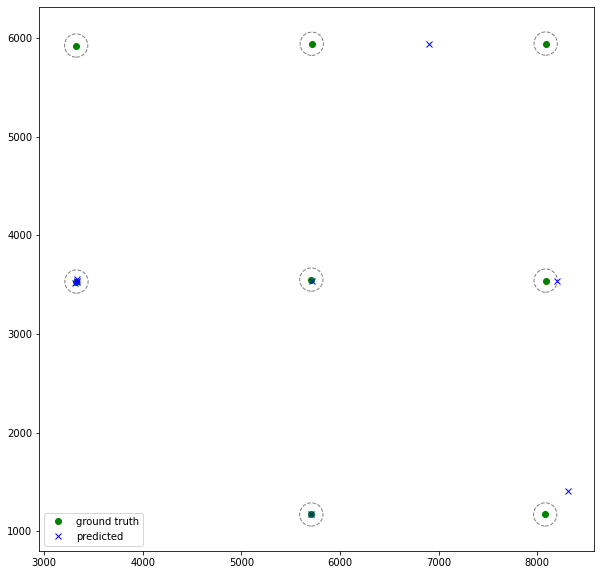

In [7]:
show_predictions(ground_truth, predicted, radius_limit)

Considering predicted point 00: ( 5710.0, 1170.0)
	Matches gt point 00: ( 5710.0, 1170.0) @ 0.0
	First match (good)
	tp:  1, fn:  7, fp:  8, |expt|:8, |pred|:9, x:0.00, y:0.11, area:0.000
Considering predicted point 04: ( 3340.0, 3530.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 10.0
	First match (good)
	tp:  2, fn:  6, fp:  7, |expt|:8, |pred|:9, x:0.08, y:0.23, area:0.014
Considering predicted point 02: ( 3340.0, 3540.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 14.1
	EXTRA MATCH (noise)
Considering predicted point 03: ( 3320.0, 3520.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 14.1
	EXTRA MATCH (noise)
Considering predicted point 06: ( 5720.0, 3540.0)
	Matches gt point 03: ( 5710.0, 3550.0) @ 14.1
	First match (good)
	tp:  3, fn:  5, fp:  6, |expt|:8, |pred|:9, x:0.12, y:0.34, area:0.024
Considering predicted point 05: ( 3340.0, 3560.0)
	Matches gt point 02: ( 3330.0, 3530.0) @ 31.6
	EXTRA MATCH (noise)
Considering predicted point 07: ( 8203.0, 3540.0)
	Matches gt point 04: ( 8085.0

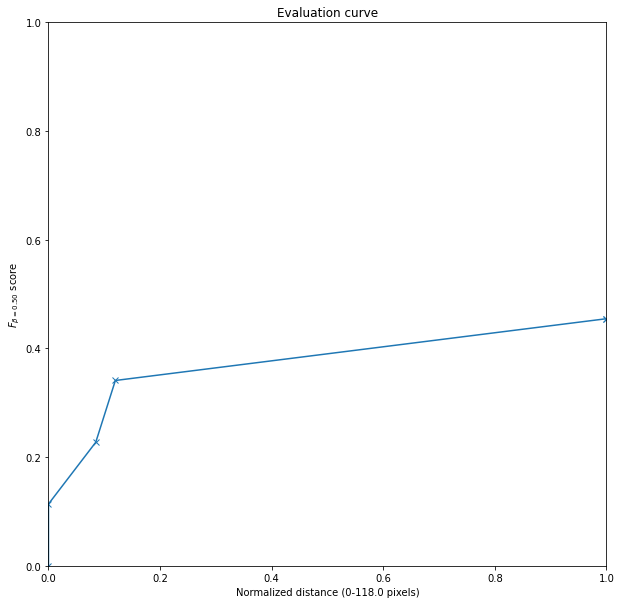

(0.37447791253840795,
              Precision  Recall    F-beta  True Positives  False Positives  \
 Distance                                                                    
 0.000000      0.111111   0.125  0.113636               1                8   
 10.000000     0.222222   0.250  0.227273               2                7   
 14.142136     0.222222   0.250  0.227273               2                7   
 14.142136     0.222222   0.250  0.227273               2                7   
 14.142136     0.333333   0.375  0.340909               3                6   
 31.622776     0.333333   0.375  0.340909               3                6   
 118.000000    0.444444   0.500  0.454545               4                5   
 333.754395    0.444444   0.500  0.454545               4                5   
 1185.000366   0.444444   0.500  0.454545               4                5   
 
              False Negatives  Error type  Prediction x  Prediction y  
 Distance                                     

In [8]:
eval_pt_detect(ground_truth, predicted, radius_limit, beta=0.5, debug=True, show_plot=True)

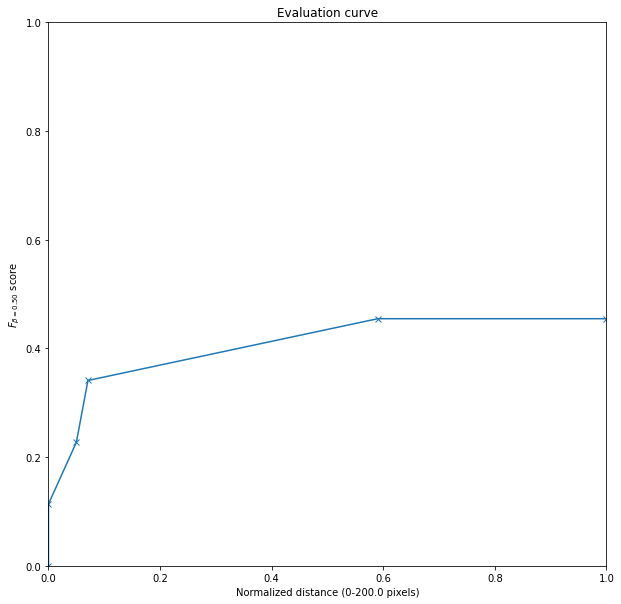

In [9]:
area, df, df_dbg = eval_pt_detect(ground_truth, predicted, 200, beta=0.5, show_plot=True)

In [10]:
df

,Precision,Recall,F-beta,True Positives,False Positives,False Negatives,Error type,Prediction x,Prediction y
Distance,,,,,,,,,
0.000000,0.111111,0.125,0.113636,1,8,7,0,5710.0,1170.0
10.000000,0.222222,0.250,0.227273,2,7,6,0,3340.0,3530.0
14.142136,0.222222,0.250,0.227273,2,7,6,1,3340.0,3540.0
14.142136,0.222222,0.250,0.227273,2,7,6,1,3320.0,3520.0
14.142136,0.333333,0.375,0.340909,3,6,5,0,5720.0,3540.0
31.622776,0.333333,0.375,0.340909,3,6,5,1,3340.0,3560.0
118.000000,0.444444,0.500,0.454545,4,5,4,0,8203.0,3540.0
333.754395,0.444444,0.500,0.454545,4,5,4,2,8316.0,1406.0
1185.000366,0.444444,0.500,0.454545,4,5,4,2,6900.0,5941.0


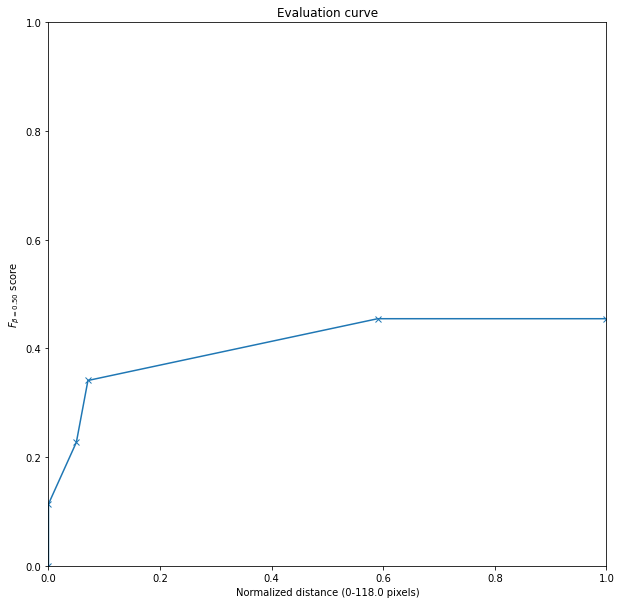

In [11]:
plot_f_vs_dist_curve(df_dbg, radius_limit, beta=0.5)

In [12]:
from sklearn.metrics import auc

In [13]:
auc(df_dbg["Normalized distance"], df_dbg["F-beta"])

0.40730560476129707

In [14]:
area

0.40730560476129707

In [15]:
df_dbg

,Normalized distance,F-beta
0,0.000000,0.000000
1,0.000000,0.113636
2,0.050000,0.227273
3,0.070711,0.340909
4,0.590000,0.454545
5,1.000000,0.454545


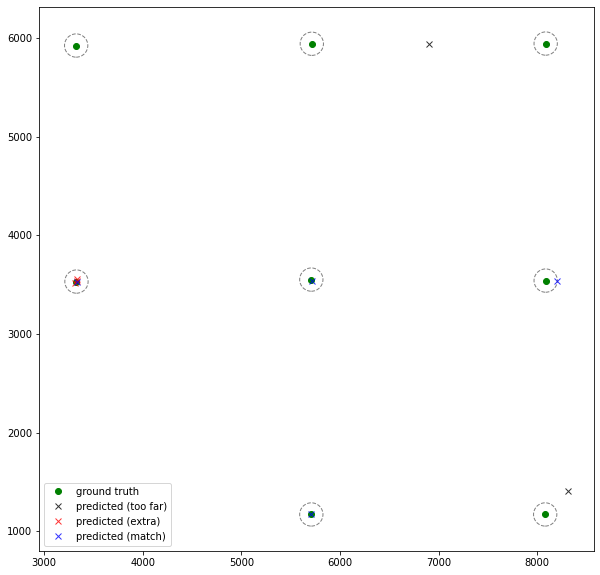

In [16]:
show_predictions_classified(ground_truth, df, radius_limit)

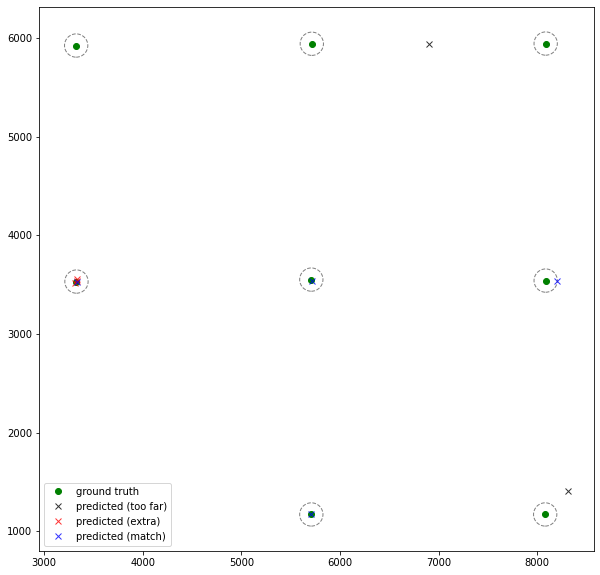

In [17]:
show_predictions_classified(ground_truth, df, radius_limit, filename="out.pdf")